# Statistics for Machine Learning Prediction

### Motivation: Decide which model is the best after evaluate multiple training and testing data sets

The evaluation of the correctness of the model and the selection of the best model cannot be done after a single train/test experiment. Multiple train/test sets have to be used to evaluate models and select the best model. To do so, I performed 70 runs of exploratory Data Analysis for Logistic Regression, Support Vector Machine, Decision Tree Classifier, and k Nearest Neighbors models. To make the results of my study easy to reproduce I used specified values of random seeds.

**Methodology:**
* Data were generated with default parameters set from Assignment: Machine Learning Prediction.
* Different training/test sets were tested by changing <code>random_seed</code> from 0 to 69 inside <code>train_test_split</code> function.
* Data were collected for each method as a Train Score, Test Score, and from Confusion Matrix as a True Negative (**TN**), False Negative (**FN**), False Positive (**FP**), True Positive (**TP**), And Correctness.
* Correctness of the model was calculated using data from Confusion Matrix according to the following equation: $Correctness = \frac{TN + TP}{TN+FN+FP+TP}$
* All data are enclosed in statistic.csv file available on GitHub.

Table description:

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| RS            | value of the <code>random_seed</code> parameter                                                             |
|               |                                                                                                             |
| LR_Tr_Acc     | Train data accuracy for Logistic Regression                                                                 |
| LR_Te_Acc     | Test data accuracy for Logistic Regression                                                                  |
| LR_TN         | True Negatives from the Confusion Matrix for Logistic Regression                                            |
| LR_FN         | False Negatives from the Confusion Matrix for Logistic Regression                                           |
| LR_FP         | False Positives from the Confusion Matrix for Logistic Regression                                           |
| LR_TP         | True Positives from the Confusion Matrix for Logistic Regression                                            |
| LR_corr       | Correctness of the predictions from Logistic Regression                                                     |
|               |                                                                                                             |
| SV_Tr_Acc     | Train data accuracy for Support Vector Machine                                                              |
| SV_Te_Acc     | Test data accuracy for Support Vector Machine                                                               |
| SV_TN         | True Negatives from the Confusion Matrix for Support Vector Machine                                         |
| SV_FN         | False Negatives from the Confusion Matrix for Support Vector Machine                                        |
| SV_FP         | False Positives from the Confusion Matrix for Support Vector Machine                                        |
| SV_TP         | True Positives from the Confusion Matrix for Support Vector Machine                                         |
| SV_corr       | Correctness of the predictions from Support Vector Machine                                                  |
|               |                                                                                                             |
| TR_Tr_Acc     | Train data accuracy for Decision Tree Classifier                                                            |
| TR_Te_Acc     | Test data accuracy for Decision Tree Classifier                                                             |
| TR_TN         | True Negatives from the Confusion Matrix for Decision Tree Classifier                                       |
| TR_FN         | False Negatives from the Confusion Matrix for Decision Tree Classifier                                      |
| TR_FP         | False Positives from the Confusion Matrix for Decision Tree Classifier                                      |
| TR_TP         | True Positives from the Confusion Matrix for Decision Tree Classifier                                       |
| TR_corr       | Correctness of the predictions from Decision Tree Classifier                                                |
|               |                                                                                                             |
| KNN_Tr_Acc    | Train data accuracy for k Nearest Neighbors                                                                 |
| KNN_Te_Acc    | Test data accuracy for k Nearest Neighbors                                                                  |
| KNN_TN        | True Negatives from the Confusion Matrix for k Nearest Neighbors                                            |
| KNN_FN        | False Negatives from the Confusion Matrix for k Nearest Neighbors                                           |
| KNN_FP        | False Positives from the Confusion Matrix for k Nearest Neighbors                                           |
| KNN_TP        | True Positives from the Confusion Matrix for k Nearest Neighbors                                            |
| KNN_corr      | CorrectnesSupport Vector Machines of the predictions from k Nearest Neighbors                                                     |


Install Seaborn

In [1]:
!pip install --force-reinstal seaborn==0.11.2

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached pandas-1.3.5-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.3 MB)
  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Using cached scipy-1.7.3-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (38.1 MB)
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.6-py3-none-any.whl (97 kB)
  Using cached Pillow-8.4.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.1 MB)
  Using cached fonttools-4.28.5-py3-none-any.whl (890 kB)
  Using cached pytz-2021.3-py2.py3-none-any.whl (503 kB)
  Using cached six-1.16

Import libraries:

In [2]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') #Ignore warnings about deprecated functions

Load the csv and check dataframe with <code>.head()</code>

In [3]:
stat_df=pd.read_csv("https://raw.githubusercontent.com/ljszatkowski/Applied-Data-Science-Capstone---Coursera/master/statistics.csv")
stat_df.head()

,RS,LR_Tr_Acc,LR_Te_Acc,LR_TN,LR_FN,LR_FP,LR_TP,LR_corr,SV_Tr_Acc,SV_Te_Acc,...,TR_FP,TR_TP,TR_corr,KNN_Tr_Acc,KNN_Te_Acc,KNN_TN,KNN_FN,KNN_FP,KNN_TP,KNN_corr
0,0,0.847222,0.833333,4,1,2,11,0.833333,0.847222,0.833333,...,2,11,0.833333,0.861111,0.777778,3,1,3,11,0.777778
1,1,0.861111,0.888889,4,0,2,12,0.888889,0.861111,0.888889,...,2,12,0.888889,0.888889,0.777778,3,1,3,11,0.777778
2,2,0.847222,0.833333,3,0,3,12,0.833333,0.847222,0.833333,...,3,12,0.833333,0.847222,0.833333,3,0,3,12,0.833333
3,3,0.833333,0.888889,4,2,0,12,0.888889,0.847222,0.888889,...,0,12,0.888889,0.833333,0.944444,4,1,0,13,0.944444
4,4,0.833333,0.722222,3,0,5,10,0.722222,0.861111,0.777778,...,4,10,0.777778,0.875000,0.777778,4,0,4,10,0.777778


Check dimension of dataframe

In [4]:
stat_df.shape

(70, 29)

## Correctness of the models

We can printout basic statistical information about correctness of Logistic Regression <code>LR_corr</code>, Support Vector Machine <code>SV_corr</code>, Decision Tree Classifier <code>TR_corr</code>, and k Nearest Neighbors <code>KNN_corr</code>.

In [5]:
stat_df.loc[:,['LR_corr','SV_corr','TR_corr','KNN_corr']].describe()

,LR_corr,SV_corr,TR_corr,KNN_corr
count,70.000000,70.000000,70.000000,70.000000
mean,0.823862,0.843651,0.843651,0.818056
std,0.086101,0.080420,0.080420,0.086499
min,0.611111,0.666667,0.666667,0.555556
25%,0.777778,0.777778,0.777778,0.777778
50%,0.833333,0.833333,0.833333,0.833333
75%,0.888889,0.888889,0.888889,0.888889
max,1.000000,1.000000,1.000000,1.000000


We can see that both **Support Vector Machine** and **Decision Tree Classifier** models have slightly better mean value than other models.

We can also examine Boxplot for the correctness of each model.

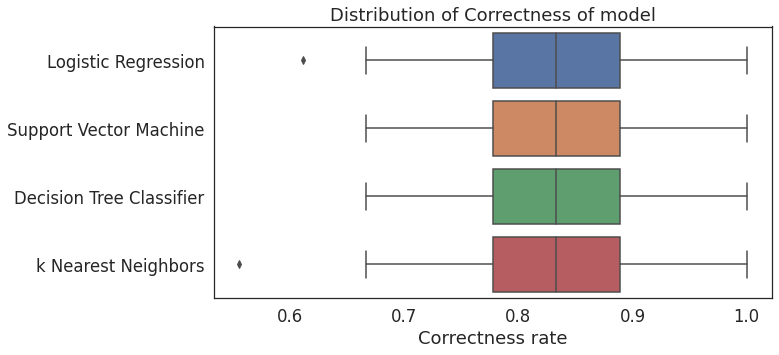

In [6]:
plt.figure(figsize=(10, 5))
sns.set(font_scale = 1.5)
sns.set_style("white")
ax = sns.boxplot(x='value', y='variable', data=pd.melt(stat_df.loc[:,['LR_corr','SV_corr','TR_corr','KNN_corr']]))
ax.yaxis.set_ticklabels(['Logistic Regression', 'Support Vector Machine','Decision Tree Classifier','k Nearest Neighbors'])

plt.title("Distribution of Correctness of model")
plt.xlabel('Correctness rate')
plt.ylabel(None)

plt.show()
plt.close()

We can see some points below the bottom threshold for both, Logistic Regression and k Nearest Neighbors. This suggests that **Support Vector Machine** and **Decision Tree Classifier** models are performing much better and did not have any sticking out points.

Finally, we can view the histogram of correctness values and see if we can learn anything else:

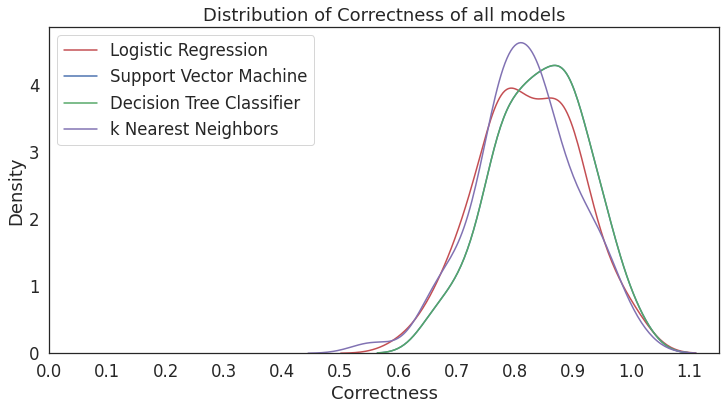

In [7]:
plt.figure(figsize=(12, 6))

sns.set(font_scale = 1.5)
sns.set_style("white")

ax1 = sns.distplot(stat_df['LR_corr'], hist=False, color="r", label ="Logistic Regression")
ax2 = sns.distplot(stat_df['SV_corr'], hist=False, color="b", label ="Support Vector Machine", ax=ax1)
ax3 = sns.distplot(stat_df['TR_corr'], hist=False, color="g", label ="Decision Tree Classifier", ax=ax1)
ax4 = sns.distplot(stat_df['KNN_corr'], hist=False, color="m", label ="k Nearest Neighbors", ax=ax1)
ax1.set(xlim=(0, 1.15))
plt.xticks(np.arange(0, 1.2, 0.1))

plt.title("Distribution of Correctness of all models")
plt.xlabel('Correctness')
plt.ylabel('Density')
plt.legend()

plt.show()
plt.close()

Once again we can see that top of the peak for **Support Vector Machine** and **Decision Tree Classifier** models are shifted much closer toward 1.0 than in the case of Logistic Regression and k Nearest Neighbors. This again suggests that **Support Vector Machine** and **Decision Tree Classifier** perform slightly better.

## Confusion Matrices

Below are set of statistic tables for Confusion Matrices for each model:

* Logistic Regression

In [8]:
stat_df.loc[:,['LR_TN','LR_FN','LR_FP','LR_TP']].describe()

,LR_TN,LR_FN,LR_FP,LR_TP
count,70.000000,70.000000,70.000000,70.000000
mean,3.600000,0.628571,2.542857,11.214286
std,1.334058,0.837031,1.594244,1.743666
min,1.000000,0.000000,0.000000,7.000000
25%,3.000000,0.000000,1.250000,10.000000
50%,3.500000,0.000000,2.000000,11.000000
75%,4.750000,1.000000,3.000000,12.000000
max,7.000000,3.000000,7.000000,15.000000


* Support Vector Machine

In [9]:
stat_df.loc[:,['SV_TN','SV_FN','SV_FP','SV_TP']].describe()

,SV_TN,SV_FN,SV_FP,SV_TP
count,70.000000,70.000000,70.000000,70.000000
mean,4.057143,0.671429,2.142857,11.128571
std,1.306458,0.756066,1.321897,1.784973
min,1.000000,0.000000,0.000000,6.000000
25%,3.000000,0.000000,1.000000,10.000000
50%,4.000000,1.000000,2.000000,11.000000
75%,5.000000,1.000000,3.000000,12.000000
max,7.000000,3.000000,5.000000,16.000000


* Decision Tree Classifier

In [10]:
stat_df.loc[:,['TR_TN','TR_FN','TR_FP','TR_TP']].describe()

,TR_TN,TR_FN,TR_FP,TR_TP
count,70.000000,70.000000,70.000000,70.000000
mean,4.057143,0.685714,2.128571,11.128571
std,1.306458,0.790209,1.317897,1.784973
min,1.000000,0.000000,0.000000,6.000000
25%,3.000000,0.000000,1.000000,10.000000
50%,4.000000,1.000000,2.000000,11.000000
75%,5.000000,1.000000,3.000000,12.000000
max,7.000000,3.000000,5.000000,16.000000


* k Nearest Neighbors

In [11]:
stat_df.loc[:,['KNN_TN','KNN_FN','KNN_FP','KNN_TP']].describe()

,KNN_TN,KNN_FN,KNN_FP,KNN_TP
count,70.000000,70.000000,70.000000,70.000000
mean,3.514286,0.657143,2.614286,11.185714
std,1.359272,0.866205,1.487073,1.851696
min,1.000000,0.000000,0.000000,7.000000
25%,3.000000,0.000000,2.000000,10.000000
50%,3.000000,0.000000,3.000000,11.000000
75%,4.000000,1.000000,4.000000,12.000000
max,7.000000,4.000000,6.000000,16.000000


Tables does not tells us a lot since all data looks similar.
We can prepare histograms for each models and looks again:

* Logistic Regression

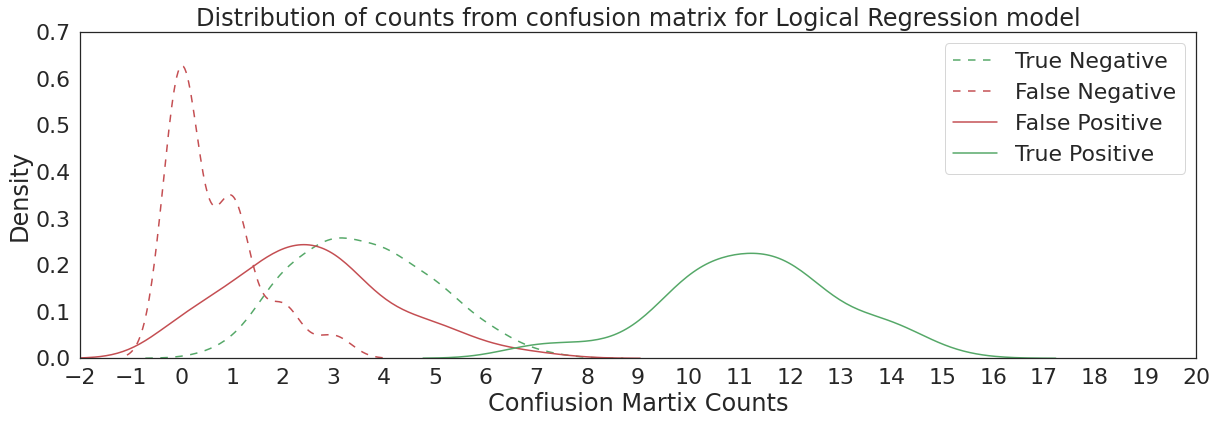

In [12]:
plt.figure(figsize=(20, 6))

sns.set(font_scale = 2)
sns.set_style("white")

ax1 = sns.distplot(stat_df['LR_TN'], hist=False, color="g", label ="True Negative")
ax2 = sns.distplot(stat_df['LR_FN'], hist=False, color="r", label ="False Negative", ax=ax1)
ax3 = sns.distplot(stat_df['LR_FP'], hist=False, color="r", label ="False Positive", ax=ax1)
ax4 = sns.distplot(stat_df['LR_TP'], hist=False, color="g", label ="True Positive", ax=ax1)
ax1.lines[0].set_linestyle((0, (5, 5)))
ax2.lines[1].set_linestyle((0, (5, 5)))
ax1.set(xlim=(-2, 20))
ax1.set(ylim=(0,0.7))
plt.xticks(np.arange(-2, 21, 1))

plt.title("Distribution of counts from confusion matrix for Logical Regression model")
plt.xlabel('Confiusion Martix Counts')
plt.ylabel('Density')
plt.legend()

plt.show()
plt.close()

* Support Vector Machine

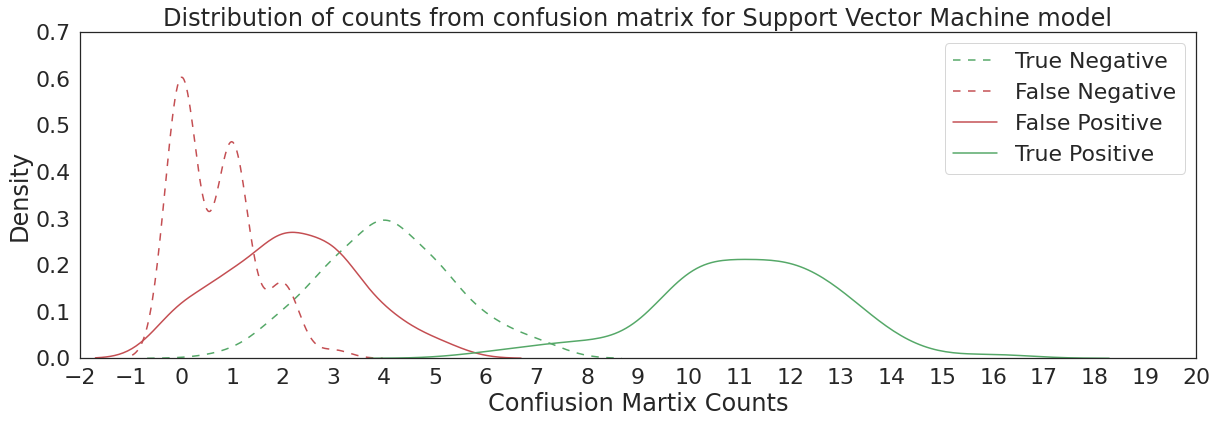

In [13]:
plt.figure(figsize=(20, 6))

sns.set(font_scale = 2)
sns.set_style("white")

ax1 = sns.distplot(stat_df['SV_TN'], hist=False, color="g", label ="True Negative")
ax2 = sns.distplot(stat_df['SV_FN'], hist=False, color="r", label ="False Negative", ax=ax1)
ax3 = sns.distplot(stat_df['SV_FP'], hist=False, color="r", label ="False Positive", ax=ax1)
ax4 = sns.distplot(stat_df['SV_TP'], hist=False, color="g", label ="True Positive", ax=ax1)
ax1.lines[0].set_linestyle((0, (5, 5)))
ax2.lines[1].set_linestyle((0, (5, 5)))
ax1.set(xlim=(-2, 20))
ax1.set(ylim=(0,0.7))
plt.xticks(np.arange(-2, 21, 1))


plt.title("Distribution of counts from confusion matrix for Support Vector Machine model")
plt.xlabel('Confiusion Martix Counts')
plt.ylabel('Density')
plt.legend()

plt.show()
plt.close()

* Decision Tree Classifier

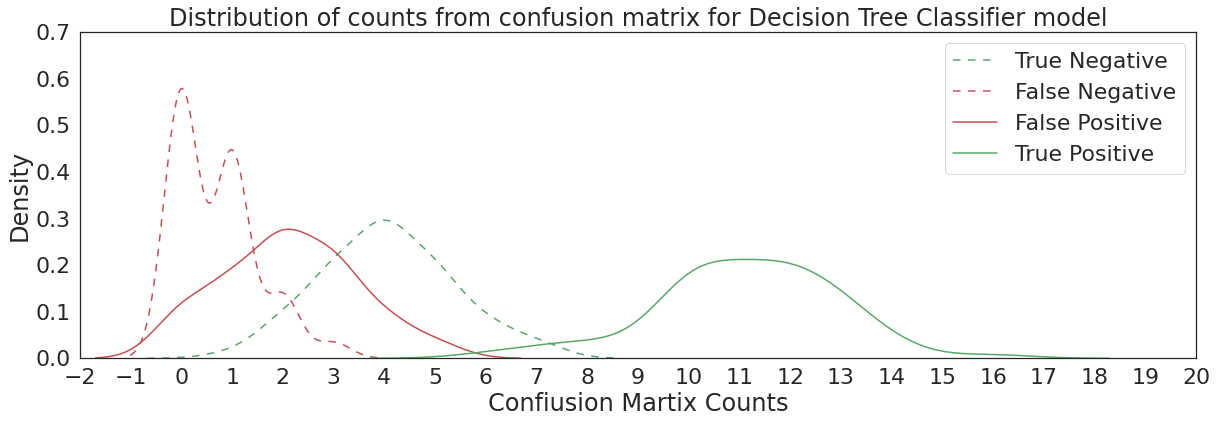

In [14]:
plt.figure(figsize=(20, 6))

sns.set(font_scale = 2)
sns.set_style("white")

ax1 = sns.distplot(stat_df['TR_TN'], hist=False, color="g", label ="True Negative")
ax2 = sns.distplot(stat_df['TR_FN'], hist=False, color="r", label ="False Negative", ax=ax1)
ax3 = sns.distplot(stat_df['TR_FP'], hist=False, color="r", label ="False Positive", ax=ax1)
ax4 = sns.distplot(stat_df['TR_TP'], hist=False, color="g", label ="True Positive", ax=ax1)
ax1.lines[0].set_linestyle((0, (5, 5)))
ax2.lines[1].set_linestyle((0, (5, 5)))
ax1.set(xlim=(-2, 20))
ax1.set(ylim=(0,0.7))
plt.xticks(np.arange(-2, 21, 1))


plt.title("Distribution of counts from confusion matrix for Decision Tree Classifier model")
plt.xlabel('Confiusion Martix Counts')
plt.ylabel('Density')
plt.legend()

plt.show()
plt.close()

* k Nearest Neighbors

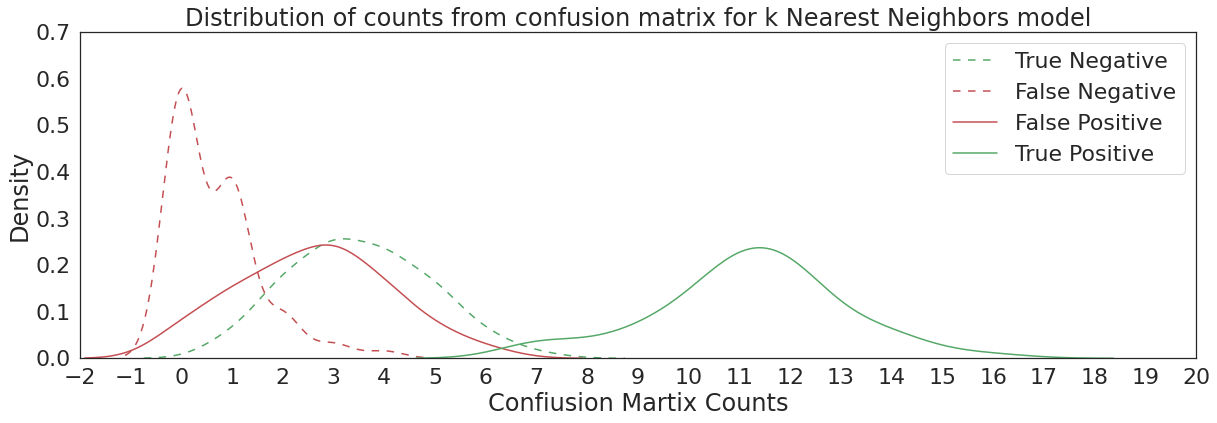

In [15]:
plt.figure(figsize=(20, 6))

sns.set(font_scale = 2)
sns.set_style("white")

ax1 = sns.distplot(stat_df['KNN_TN'], hist=False, color="g", label ="True Negative")
ax2 = sns.distplot(stat_df['KNN_FN'], hist=False, color="r", label ="False Negative", ax=ax1)
ax3 = sns.distplot(stat_df['KNN_FP'], hist=False, color="r", label ="False Positive", ax=ax1)
ax4 = sns.distplot(stat_df['KNN_TP'], hist=False, color="g", label ="True Positive", ax=ax1)
ax1.lines[0].set_linestyle((0, (5, 5)))
ax2.lines[1].set_linestyle((0, (5, 5)))
ax1.set(xlim=(-2, 20))
ax1.set(ylim=(0,0.7))
plt.xticks(np.arange(-2, 21, 1))


plt.title("Distribution of counts from confusion matrix for k Nearest Neighbors model")
plt.xlabel('Confiusion Martix Counts')
plt.ylabel('Density')
plt.legend()

plt.show()
plt.close()

Once again we can see that top of the "True" peaks for **Support Vector Machine** and **Decision Tree Classifier** is shifted toward higher values than in the case of Logistic Regression and k Nearest Neighbors.

Additionally, the top of the peak for "False Positive" results from Logistic Regression and k Nearest Neighbors is shifted toward higher values suggesting that these models will incorrectly predict the success of the mission with a much higher rate than Support Vector Machine and Decision Tree Classifier models.

This confirms that **Support Vector Machine** and **Decision Tree Classifier** perform slightly better than other models.

## FINAL CONCLUSION:

 **Support Vector Machine** and **Decision Tree Classifier** are more precise than Logistic Regression and k Nearest Neighbors
 
 
 
 




## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2021-12-21        | 1.0     | Lukasz     | Created document                    |
